In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,f1_score,r2_score, mean_squared_error
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC

In [85]:
data = pd.read_csv(r'H:\DATA\MY\practice\Practice-31\bank-additional-full.csv',delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [86]:
print(data.shape)
print(data.info())

(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

In [87]:
for column in data.columns:
  if data[column].dtype == object:
    print(column)
    print(Counter(data[column]))
    print('')

job
Counter({'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'services': 3969, 'management': 2924, 'retired': 1720, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875, 'unknown': 330})

marital
Counter({'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80})

education
Counter({'university.degree': 12168, 'high.school': 9515, 'basic.9y': 6045, 'professional.course': 5243, 'basic.4y': 4176, 'basic.6y': 2292, 'unknown': 1731, 'illiterate': 18})

default
Counter({'no': 32588, 'unknown': 8597, 'yes': 3})

housing
Counter({'yes': 21576, 'no': 18622, 'unknown': 990})

loan
Counter({'no': 33950, 'yes': 6248, 'unknown': 990})

contact
Counter({'cellular': 26144, 'telephone': 15044})

month
Counter({'may': 13769, 'jul': 7174, 'aug': 6178, 'jun': 5318, 'nov': 4101, 'apr': 2632, 'oct': 718, 'sep': 570, 'mar': 546, 'dec': 182})

day_of_week
Counter({'thu': 8623, 'mon': 8514, 'wed': 8134, 'tue': 8090, 'fri': 7827})

poutcome
Cou

In [88]:
data = data.drop(columns = ['day_of_week','emp.var.rate','cons.price.idx','cons.conf.idx',
                            'poutcome','euribor3m','nr.employed'])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,no


In [89]:
for column in data.columns:
  if data[column].dtype == object:
    data = data[data[column] != 'unknown']
    print('the feature : ',column)
    print(Counter(data[column]))
    
print(data.shape)

the feature :  job
Counter({'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'services': 3969, 'management': 2924, 'retired': 1720, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875})
the feature :  marital
Counter({'married': 24694, 'single': 11494, 'divorced': 4599})
the feature :  education
Counter({'university.degree': 12096, 'high.school': 9464, 'basic.9y': 6006, 'professional.course': 5225, 'basic.4y': 4118, 'basic.6y': 2264, 'illiterate': 18})
the feature :  default
Counter({'no': 31224, 'yes': 3})
the feature :  housing
Counter({'yes': 16521, 'no': 13967})
the feature :  loan
Counter({'no': 25720, 'yes': 4768})
the feature :  contact
Counter({'cellular': 20443, 'telephone': 10045})
the feature :  month
Counter({'may': 9733, 'jul': 5081, 'aug': 4673, 'jun': 3614, 'nov': 3496, 'apr': 2115, 'oct': 642, 'sep': 495, 'mar': 482, 'dec': 157})
the feature :  y
Counter({'no': 26629, 'yes': 3859})
(30488, 14)


In [90]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


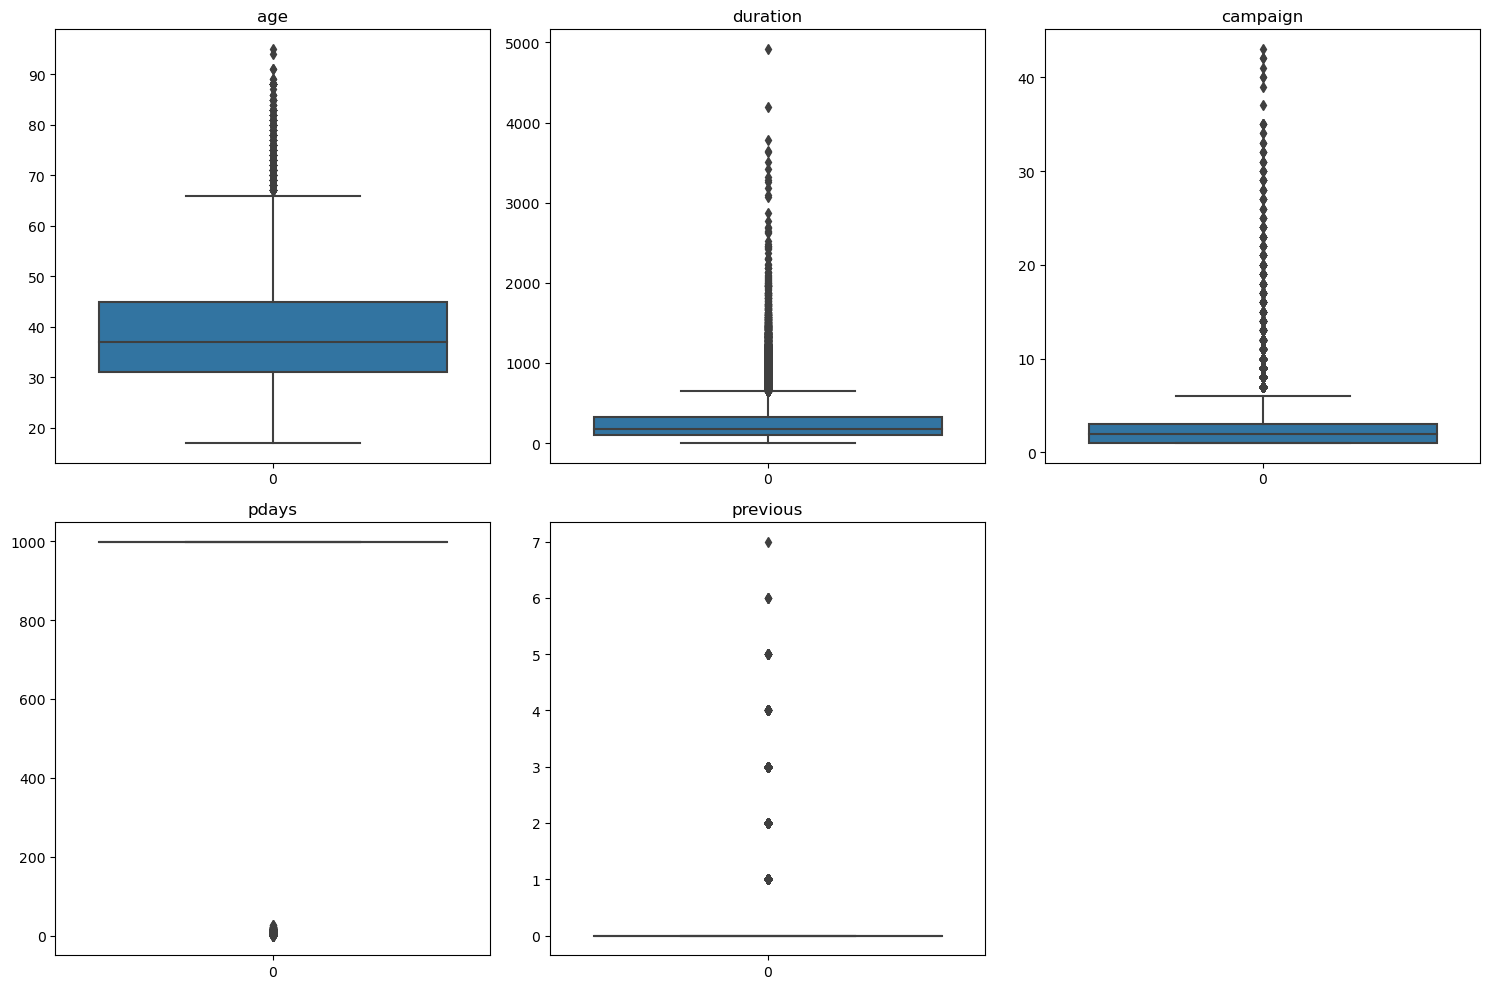

In [91]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
cols = 3  # Number of plots per row (you can adjust this)
rows = (num_cols // cols) + (num_cols % cols > 0)

plt.figure(figsize=(15, 5*rows))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [92]:
for column in data.columns:
  if data[column].dtype != object:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    data = data[(data[column] >= lower) & (data[column] <= upper)]

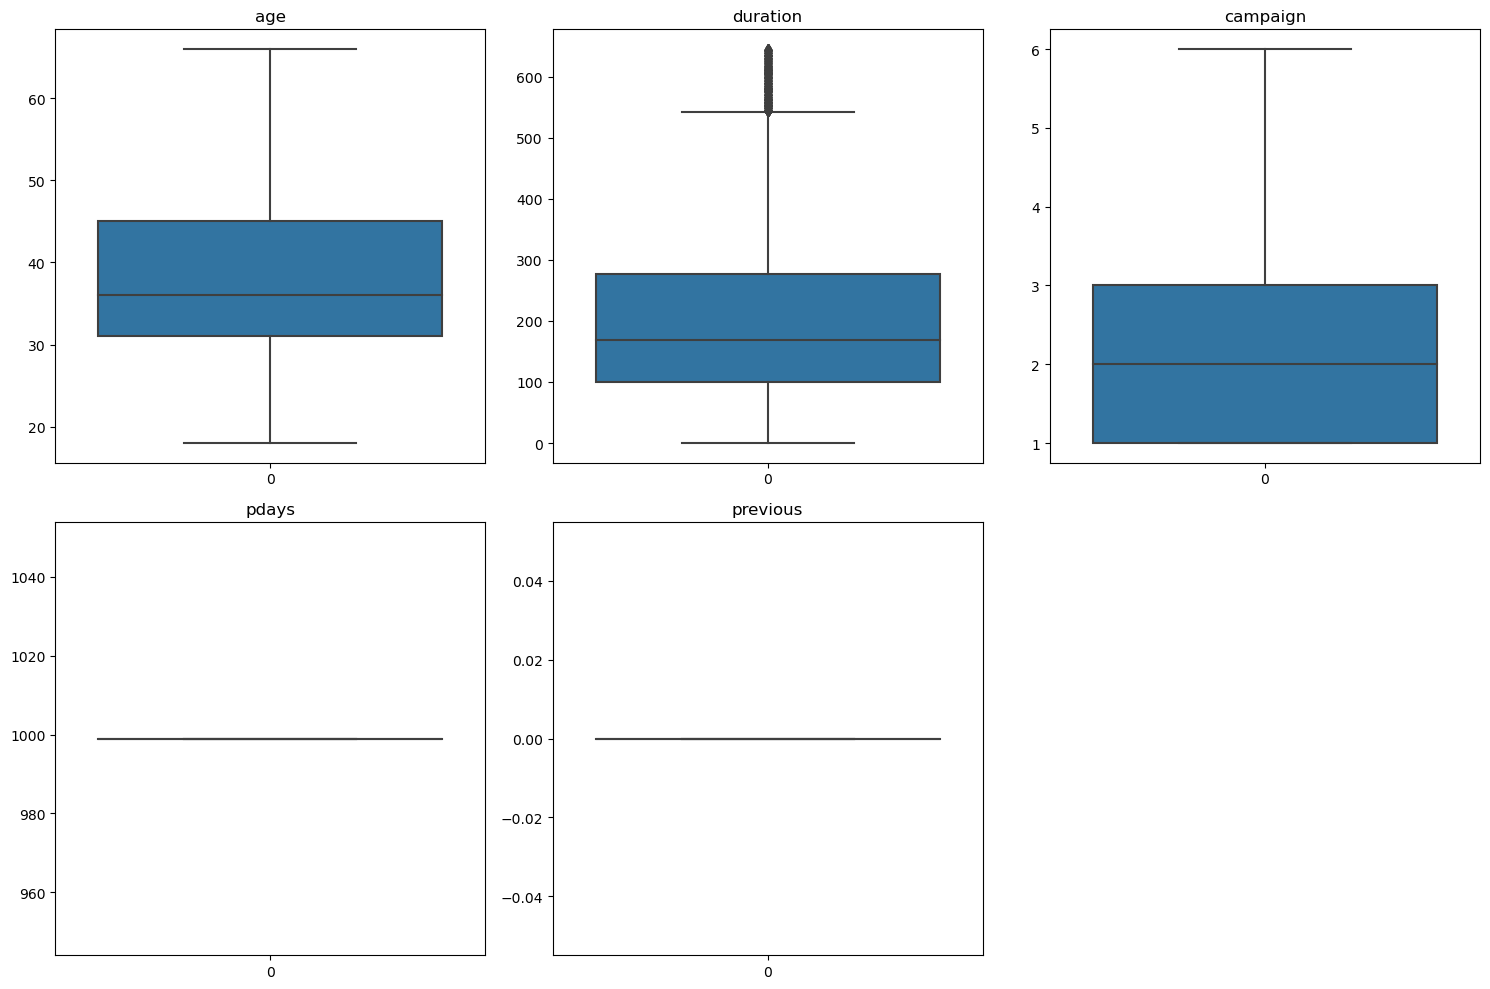

In [93]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
cols = 3  # Number of plots per row (you can adjust this)
rows = (num_cols // cols) + (num_cols % cols > 0)

plt.figure(figsize=(15, 5*rows))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [94]:
data.shape

(22213, 14)

In [95]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,139,1,999,0,no


In [99]:
from sklearn.preprocessing import LabelEncoder
model = RandomForestClassifier(random_state= 42,class_weight='balanced')
encoder = LabelEncoder()


X = data.drop('y', axis = 1).apply(lambda col: encoder.fit_transform(col))
Y = data['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print('the accuracy for the training data : ',accuracy_train)
print('the accuracy for the testing data : ',accuracy)
print(report)


the accuracy for the training data :  0.9999437253798537
the accuracy for the testing data :  0.9322529822192213
              precision    recall  f1-score   support

          no       0.94      0.99      0.96      4136
         yes       0.55      0.10      0.18       307

    accuracy                           0.93      4443
   macro avg       0.74      0.55      0.57      4443
weighted avg       0.91      0.93      0.91      4443



In [100]:
cv_score = cross_val_score(model, X, Y, scoring='accuracy')

print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the cross validation score :  [0.93315327 0.89871708 0.9153725  0.8525439  0.65060783]
the mean cross validation score :  0.8500789174761852


In [98]:
# even though the model accuracy was high but it's not consistent especially with 1 class 
# this could be duo to the imbalanced data issue

print(Counter(Y))

Counter({'no': 20731, 'yes': 1482})


In [103]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cv_score = cross_val_score(model,X_resampled, y_resampled, scoring='accuracy')


print('the target variable class counts : ',Counter(y_resampled))
print('the accuracy score : ', accuracy)
print(report)
print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the target variable class counts :  Counter({'no': 20731, 'yes': 20731})
the accuracy score :  0.93874351863017
              precision    recall  f1-score   support

          no       0.96      0.92      0.94      4180
         yes       0.92      0.96      0.94      4113

    accuracy                           0.94      8293
   macro avg       0.94      0.94      0.94      8293
weighted avg       0.94      0.94      0.94      8293

the cross validation score :  [0.90980345 0.92077656 0.89664737 0.82187651 0.7303425 ]
the mean cross validation score :  0.8558892768932166


In [104]:
model = LogisticRegression(class_weight='balanced',random_state= 42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cv_score = cross_val_score(model,X_resampled, y_resampled, scoring='accuracy')


print('the accuracy score : ', accuracy)
print(report)
print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

the target variable class counts :  Counter({'no': 20731, 'yes': 20731})
the accuracy score :  0.8023634390449776
              precision    recall  f1-score   support

          no       0.82      0.79      0.80      4180
         yes       0.79      0.82      0.80      4113

    accuracy                           0.80      8293
   macro avg       0.80      0.80      0.80      8293
weighted avg       0.80      0.80      0.80      8293

the cross validation score :  [0.82804775 0.82804775 0.70260492 0.74421129 0.71840328]
the mean cross validation score :  0.7642629981789139


c:\Users\mouncef\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
model = KNeighborsClassifier(n_neighbors= 3)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cv_score = cross_val_score(model,X_resampled, y_resampled, scoring='accuracy')


print('the accuracy score : ', accuracy)
print(report)
print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the accuracy score :  0.9040154347039672
              precision    recall  f1-score   support

          no       0.99      0.82      0.90      4180
         yes       0.84      0.99      0.91      4113

    accuracy                           0.90      8293
   macro avg       0.92      0.90      0.90      8293
weighted avg       0.92      0.90      0.90      8293

the cross validation score :  [0.88182805 0.87808996 0.86263869 0.89544139 0.89170285]
the mean cross validation score :  0.8819401852869481


In [110]:
model = SVC(kernel='rbf')

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cv_score = cross_val_score(model,X_resampled, y_resampled, scoring='accuracy')


print('the accuracy score : ', accuracy)
print(report)
print('the cross validation score : ',cv_score)
print('the mean cross validation score : ',cv_score.mean())

the accuracy score :  0.7237429157120463
              precision    recall  f1-score   support

          no       0.74      0.70      0.72      4180
         yes       0.71      0.75      0.73      4113

    accuracy                           0.72      8293
   macro avg       0.72      0.72      0.72      8293
weighted avg       0.72      0.72      0.72      8293

the cross validation score :  [0.6811769  0.70384662 0.70356971 0.71828268 0.71345876]
the mean cross validation score :  0.7040669314154895


In [111]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Apply GridSearchCV for tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Test Accuracy: 0.9104063668153864


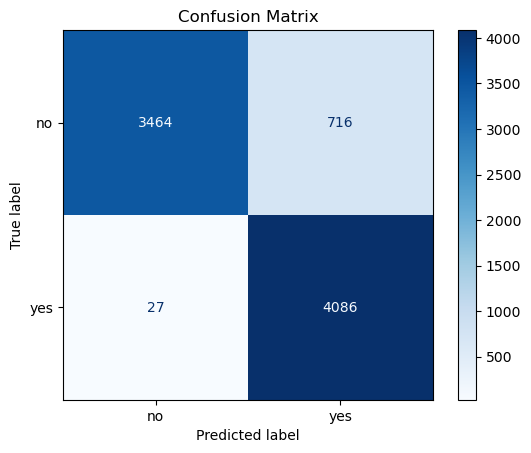

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with the best model
y_pred = best_knn.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


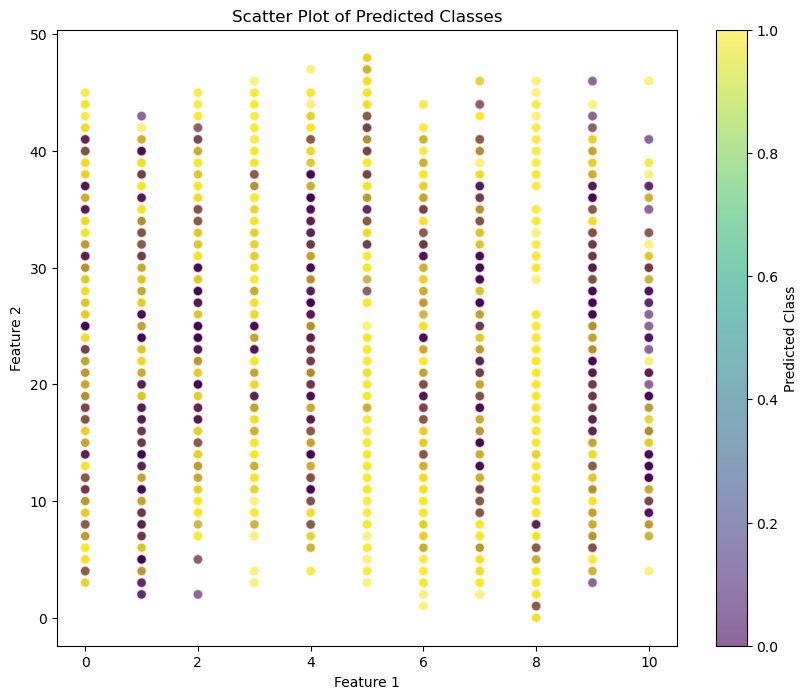